In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gv_load='gun_violence_final.csv'
gv_df=pd.read_csv(gv_load)
gv_df.head()

,Incident_ID,Incident Date,State,City Or County,Address,# Killed,# Injured,TotalVictim,Month/Year,Year
0,97407,2016-01-2014,Oklahoma,Ardmore,H St NE and Martin Luther King Blvd,2,5,7,201401,2014
1,95550,12-01-2014,Alabama,Huntsville,University Drive,0,5,5,201401,2014
2,95579,12-01-2014,Illinois,Elgin,300 block of North Street,0,5,5,201401,2014
3,97365,2016-01-2014,Utah,Spanish Fork,37 N. 630 West,5,0,5,201401,2014
4,113665,27-01-2014,Washington,Seattle,2nd Avenue South and South Main Street,1,4,5,201401,2014


In [5]:
gv_df["State"].value_counts()

California              91
Illinois                86
Texas                   62
Florida                 61
Georgia                 45
Tennessee               38
Ohio                    36
New York                34
Louisiana               31
Pennsylvania            31
Alabama                 28
Maryland                26
Missouri                25
Virginia                24
Michigan                22
North Carolina          20
Indiana                 20
South Carolina          19
Mississippi             18
New Jersey              17
Arizona                 13
Washington              12
Kentucky                11
Minnesota               10
Arkansas                 9
Connecticut              8
District of Columbia     8
Colorado                 8
New Mexico               7
Wisconsin                7
Oklahoma                 7
Massachusetts            7
Kansas                   7
Nevada                   5
Delaware                 4
Oregon                   4
Nebraska                 4
U

In [6]:
grouped_data=gv_df.groupby("State")
grouped_data.count()

,Incident_ID,Incident Date,City Or County,Address,# Killed,# Injured,TotalVictim,Month/Year,Year
State,,,,,,,,,
Alabama,28,28,28,28,28,28,28,28,28
Alaska,1,1,1,1,1,1,1,1,1
Arizona,13,13,13,13,13,13,13,13,13
Arkansas,9,9,9,9,9,9,9,9,9
California,91,91,91,91,91,91,91,91,91
Colorado,8,8,8,8,8,8,8,8,8
Connecticut,8,8,8,8,8,8,8,8,8
Delaware,4,4,4,4,4,4,4,4,4
District of Columbia,8,8,8,8,8,8,8,8,8


In [7]:
df_1=pd.DataFrame({
    "States": grouped_data["State"].unique(),
    "# Incidents":grouped_data["State"].count()
})
df_1.head()

,States,# Incidents
State,,
Alabama,[Alabama],28
Alaska,[Alaska],1
Arizona,[Arizona],13
Arkansas,[Arkansas],9
California,[California],91


In [8]:
df_1=df_1.sort_values('# Incidents', ascending = False)
df_2=df_1[:5].copy()

new_row = pd.DataFrame(data = {
    'States' : ['Others'],
    '# Incidents' : [df_1['# Incidents'][5:].sum()]
})

df_2 = pd.concat([df_2, new_row])
df_2

,States,# Incidents
California,[California],91
Illinois,[Illinois],86
Texas,[Texas],62
Florida,[Florida],61
Georgia,[Georgia],45
0,Others,534


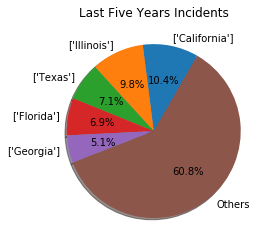

In [10]:
plt.pie(df_2["# Incidents"],labels=df_2["States"],autopct="%1.1f%%",shadow=True, startangle=60)
plt.title("Last Five Years Incidents")
plt.savefig("PercentangeStates_Final.png")